In [1]:
#Fashion datatset

In [25]:
import torch
from torch import optim
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))
                               ])
#Download the training data and load it
# Use standard FashionMNIST dataset

trainset = datasets.FashionMNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

100%|█████████▉| 26320896/26421880 [00:17<00:00, 1480891.92it/s]

Extracting MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/FashionMNIST/raw



0it [00:00, ?it/s]


 56%|█████▌    | 16384/29515 [00:01<00:00, 67732.68it/s]
32768it [00:01, 21079.28it/s]                           

0it [00:00, ?it/s]

Extracting MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/FashionMNIST/raw



 95%|█████████▌| 4210688/4422102 [00:04<00:00, 1669833.08it/s]
4423680it [00:04, 1514853.36it/s]                             

0it [00:00, ?it/s]

Extracting MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/FashionMNIST/raw




8192it [00:00, 8472.24it/s]             

Extracting MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/FashionMNIST/raw
Processing...
Done!



26427392it [00:30, 1480891.92it/s]                              

In [26]:
# Building the network 
model = nn.Sequential(nn.Linear(784,256),
                      nn.ReLU(),
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))
#define the loss
criterion = nn.NLLLoss()
optimization = optim.Adam(model.parameters(), lr=0.003)

In [27]:
# Training my network
epoches = 10

for e in range(epoches):
    runing_loss = 0
    for images, labels in trainloader:
        #flatten images
        images = images.view(images.shape[0], -1)
        
        # Todo training pass
        optimization.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        
        optimization.step()
        
        runing_loss += loss.item()
    else:
        print("training loss: ", runing_loss / len(trainloader))


4423680it [00:20, 1514853.36it/s]

training loss:  0.5180550957761848
training loss:  0.3891223173564685
training loss:  0.3591089775519712
training loss:  0.3340989440631892
training loss:  0.3197726569434346
training loss:  0.3061022904834577
training loss:  0.29900440929540945
training loss:  0.28688161593002043
training loss:  0.27508165450619737
training loss:  0.2684037882779072


In [28]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([1, 784])


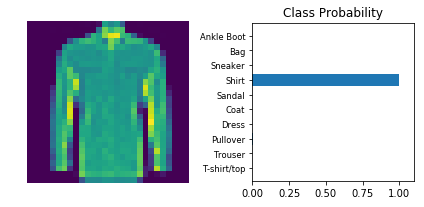

In [37]:
# Get our data
images, labels = next(iter(trainloader))
print(images.shape)

#flatten images 1 , 784
img = images.view(images.shape[0], -1)
print(img.shape)

image = images[0].view(1, 784)
print(image.shape)

with torch.no_grad():
    logits = model.forward(image)
ps = F.softmax(logits, dim=1)
view_classify(image,ps,version="Fashion")